In [2]:
import numpy as np
from sklearn.metrics import fbeta_score 
from sklearn.svm import SVC
import pandas as pd

In [3]:
conf_matrices = list()
for tp, fp in zip(range(0,101,2),range(0,101,2)[::-1]):
    for tn,fn in zip(range(0,101,2),range(0,101,2)[::-1]):
        conf_matrices.append(np.array([[tn,fp],[fn,tp]]))

In [10]:
def calc_pred_from_conf_matrix(confusion_matrices, beta, df):
    scores = list()
    for idx, conf_matrix in enumerate(confusion_matrices):
        #print(conf_matrix)
        pred_tn = np.zeros(conf_matrix[0][0])
        lab_tn = np.zeros(conf_matrix[0][0])
        pred_fp = np.ones(conf_matrix[0][1])
        lab_fp = np.zeros(conf_matrix[0][1])
        pred_fn = np.zeros(conf_matrix[1][0])
        lab_fn = np.ones(conf_matrix[1][0])
        pred_tp = np.ones(conf_matrix[1][1])
        lab_tp = np.ones(conf_matrix[1][1])
        
        prediction = np.hstack([pred_tn, pred_fp,pred_fn,pred_tp])
        label = np.hstack([lab_tn,lab_fp,lab_fn,lab_tp])
        
        scores.append(fbeta_score(label,prediction,beta=beta))
        
    df[str(beta)] = np.array(scores).T
    return df
        
        


In [27]:
df=pd.DataFrame()
betas = np.linspace(0.3, 0.6, 30)
print(betas)

for beta in betas:
    df = calc_pred_from_conf_matrix(np.array(conf_matrices),beta,df)

[0.3        0.31034483 0.32068966 0.33103448 0.34137931 0.35172414
 0.36206897 0.37241379 0.38275862 0.39310345 0.40344828 0.4137931
 0.42413793 0.43448276 0.44482759 0.45517241 0.46551724 0.47586207
 0.4862069  0.49655172 0.50689655 0.51724138 0.52758621 0.53793103
 0.54827586 0.55862069 0.56896552 0.57931034 0.58965517 0.6       ]


In [28]:
df.tail()

,0.3,0.3103448275862069,0.32068965517241377,0.3310344827586207,0.3413793103448276,0.35172413793103446,0.3620689655172414,0.37241379310344824,0.38275862068965516,0.3931034482758621,...,0.506896551724138,0.5172413793103448,0.5275862068965518,0.5379310344827586,0.5482758620689655,0.5586206896551724,0.5689655172413792,0.5793103448275863,0.5896551724137931,0.6
436,0.983755,0.982733,0.981691,0.980630,0.979552,0.978456,0.977345,0.976219,0.975080,0.973929,...,0.960722,0.959496,0.958269,0.957043,0.955817,0.954592,0.953370,0.952150,0.950933,0.949721
437,0.987766,0.986994,0.986205,0.985402,0.984585,0.983755,0.982912,0.982058,0.981193,0.980318,...,0.970249,0.969311,0.968372,0.967432,0.966492,0.965553,0.964615,0.963678,0.962743,0.961810
438,0.991811,0.991291,0.990761,0.990220,0.989670,0.989111,0.988543,0.987967,0.987383,0.986792,...,0.979968,0.979329,0.978690,0.978050,0.977409,0.976769,0.976128,0.975489,0.974850,0.974212
439,0.995889,0.995627,0.995359,0.995086,0.994808,0.994526,0.994238,0.993947,0.993651,0.993352,...,0.989882,0.989557,0.989230,0.988903,0.988576,0.988248,0.987920,0.987592,0.987265,0.986938
440,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df['dmc_score'] = [np.sum(confusion_matrix * np.array([[0, -25], [-5, 5]])) for confusion_matrix in conf_matrices]

In [30]:
df.tail()    

,0.3,0.3103448275862069,0.32068965517241377,0.3310344827586207,0.3413793103448276,0.35172413793103446,0.3620689655172414,0.37241379310344824,0.38275862068965516,0.3931034482758621,...,0.5172413793103448,0.5275862068965518,0.5379310344827586,0.5482758620689655,0.5586206896551724,0.5689655172413792,0.5793103448275863,0.5896551724137931,0.6,dmc_score
436,0.983755,0.982733,0.981691,0.980630,0.979552,0.978456,0.977345,0.976219,0.975080,0.973929,...,0.959496,0.958269,0.957043,0.955817,0.954592,0.953370,0.952150,0.950933,0.949721,400
437,0.987766,0.986994,0.986205,0.985402,0.984585,0.983755,0.982912,0.982058,0.981193,0.980318,...,0.969311,0.968372,0.967432,0.966492,0.965553,0.964615,0.963678,0.962743,0.961810,425
438,0.991811,0.991291,0.990761,0.990220,0.989670,0.989111,0.988543,0.987967,0.987383,0.986792,...,0.979329,0.978690,0.978050,0.977409,0.976769,0.976128,0.975489,0.974850,0.974212,450
439,0.995889,0.995627,0.995359,0.995086,0.994808,0.994526,0.994238,0.993947,0.993651,0.993352,...,0.989557,0.989230,0.988903,0.988576,0.988248,0.987920,0.987592,0.987265,0.986938,475
440,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,500


In [31]:
#correlation map
import matplotlib.pyplot as plt
import seaborn as sns

        

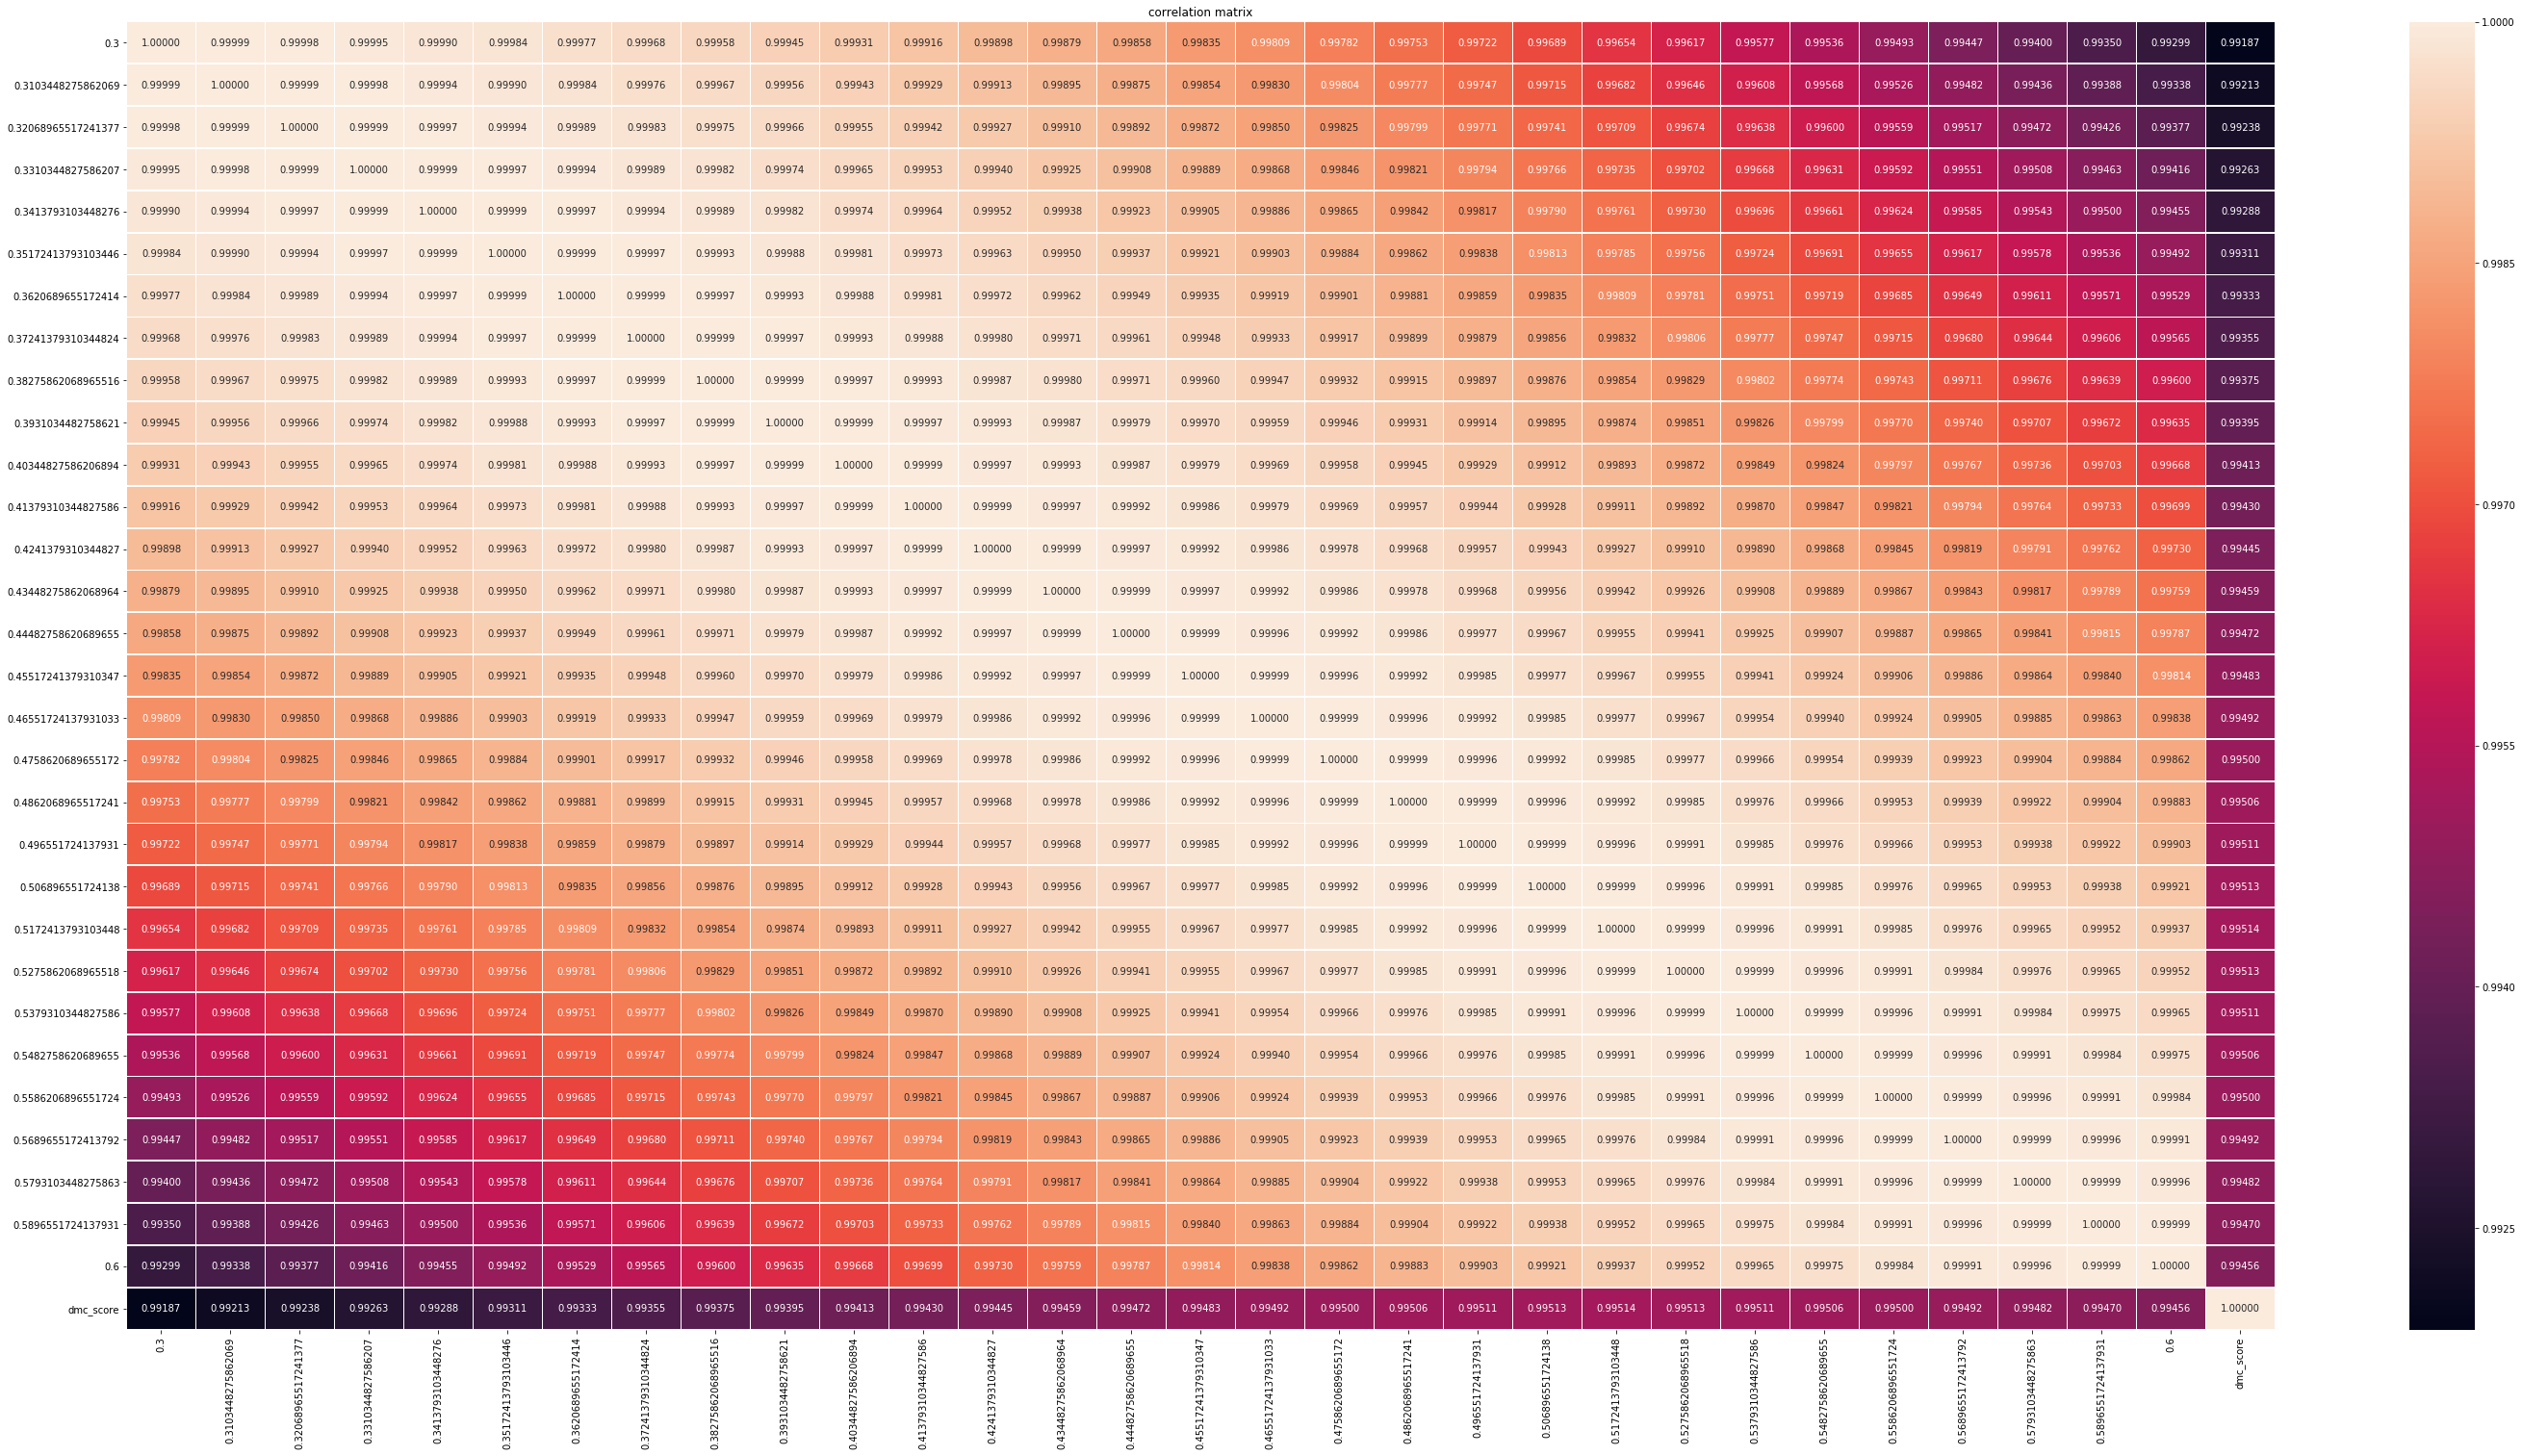

In [32]:
f,ax = plt.subplots(figsize=(50, 25))
sns.heatmap(df.corr(), annot=True, linewidths=.8, fmt= '.5f',ax=ax)
plt.title("correlation matrix")
plt.show()
